In [1]:
from pathlib import Path
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from sklearn.preprocessing import MinMaxScaler
import cvxpy as cp
import pickle
import sklearn.preprocessing

samples_path = Path.cwd() / 'samples_tensor.npy'
samples = np.load(samples_path)

# Shuffle samples
np.random.shuffle(samples)

In [2]:
# Split into train, val, test, and src
src = samples[0:50]

# val and test each get 10% training data
split_num = int((samples.shape[0] - 50) / 10)

train = samples[50:-2*split_num]
val = samples[-2*split_num:-split_num]
test = samples[-split_num:]

In [3]:
s_path = r'X:\DS Training Data\samples'
stft_path = r'X:\DS Training Data\log stft samples'

# Save the sample data into the vanilla samples folder
np.save(s_path + '\\src.npy', src)
np.save(s_path + '\\train.npy', train)
np.save(s_path + '\\val.npy', val)
np.save(s_path + '\\test.npy', test)

In [4]:
# Take the log stft of each sample

stft_src = []
stft_train = []
stft_val = []
stft_test = []

for i in range(src.shape[0]):
    stft_src.append(librosa.amplitude_to_db(librosa.stft(src[i]), ref=np.max))
for i in range(train.shape[0]):
    stft_train.append(librosa.amplitude_to_db(librosa.stft(train[i]), ref=np.max))
for i in range(val.shape[0]):
    stft_val.append(librosa.amplitude_to_db(librosa.stft(val[i]), ref=np.max))
for i in range(test.shape[0]):
    stft_test.append(librosa.amplitude_to_db(librosa.stft(test[i]), ref=np.max))

stft_src = np.array(stft_src)
stft_train = np.array(stft_train)
stft_val = np.array(stft_val)
stft_test = np.array(stft_test)
    

C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


In [22]:
print(np.min(librosa.stft(src[0])))

(-162.03819637609638+44.46691961171347j)


In [70]:
# Normalize
def normalize_freq(stft):
    for i in range(stft.shape[0]):
        stft[i]= np.nan_to_num((stft[i] - np.min(stft[i])) / (np.max(stft[i]) - np.min(stft[i])))
    return stft

stft_src = normalize_freq(stft_src)
stft_train = normalize_freq(stft_train)
stft_val = normalize_freq(stft_val)
stft_test = normalize_freq(stft_test)



In [74]:
np.save(stft_path + '\\src.npy', stft_src)
np.save(stft_path + '\\train.npy', stft_train)
np.save(stft_path + '\\val.npy', stft_val)
np.save(stft_path + '\\test.npy', stft_test)

In [5]:
sample1 = src[0] + src[1]

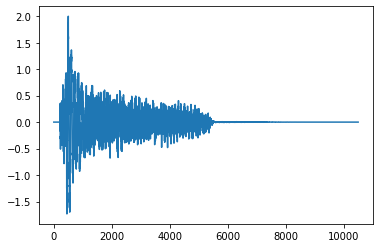

In [6]:
plt.plot(sample1[1500:12000])

In [7]:
sample2 = stft_src[0] + stft_src[1]

In [8]:
ift_sample2 = librosa.istft(librosa.db_to_amplitude(sample2))

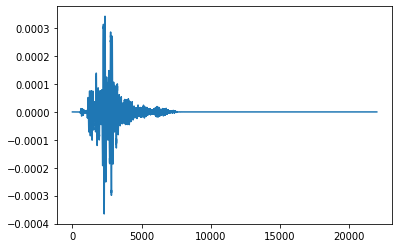

In [9]:
plt.plot(ift_sample2)

In [14]:
ift_sample2.shape

(22016,)

In [17]:
sd.play(sample1)